<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
!pip install scikeras

#Git

In [2]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 553 (delta 117), reused 11 (delta 11), pack-reused 373 (from 2)
Receiving objects: 100% (553/553), 57.71 MiB | 9.66 MiB/s, done.
Resolving deltas: 100% (274/274), done.


#Data Reading

In [3]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


#Preprocessing

###Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

df_encoded = df.copy()


# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [5]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_encoded = df_encoded.drop('Patient_ID', axis=1)
df_encoded = df_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,spinale,1,3,0,0,0,Riluzolo,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,spinale,1,0,0,0,0,nessuna terapia,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,bulbare,1,3,0,0,0,nessuna terapia,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [6]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_encoded
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,MRC_Upper_Limb,MRC_Lower_Limb,...,ALSFRS_R,ALSAQ_5,Therapy_Edaravone,Therapy_Riluzolo,Therapy_Riluzolo e Edaravone,Therapy_nessuna terapia,Clinical_onset_type_bulbare,Clinical_onset_type_multiplo,Clinical_onset_type_respiratorio,Clinical_onset_type_spinale
0,0,19.0,1,3,0,0,0,33.0,61.0,50.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,0,65.0,1,0,0,0,0,14.0,53.0,58.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,1,79.0,1,3,0,0,0,6.0,66.0,58.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###Splitting

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_encoded
X = df_encoded.drop('KINGS_Total', axis=1)
y = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1129, 27)
Testing set shape: (283, 27)


###SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Define which classes to oversample
target_classes = [1, 2]

# Create a dictionary with sampling strategy
# Example: balance 1 and 2 to reach size of class 3
class_counts = y_train.value_counts()
print("Before SMOTE:", class_counts)

sampling_strategy = {
    1: class_counts[3],  # make class 1 as large as class 3
    2: class_counts[3]   # make class 2 as large as class 3
}

# Apply SMOTE
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: KINGS_Total
4    339
3    331
2    257
1    202
Name: count, dtype: int64
After SMOTE: KINGS_Total
4    339
3    331
2    331
1    331
Name: count, dtype: int64


###Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of numerical features to standardize
numerical_features = [
    'Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
    'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
    'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'
]

# Separate numerical and categorical features for linear models
X_train_numerical = X_train_res[numerical_features]
X_test_numerical = X_test[numerical_features]

# Select the categorical features for linear models (all columns not in numerical_features)
categorical_features = X_train_res.columns.difference(numerical_features)
X_train_categorical = X_train_res[categorical_features]
X_test_categorical = X_test[categorical_features]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data for numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test_numerical)

# Convert scaled numerical arrays back to DataFrames for easier concatenation
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train_res.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Concatenate the scaled numerical features with the original categorical features
X_train_scaled = pd.concat([X_train_scaled_numerical_df, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical_df, X_test_categorical], axis=1)


print("Training data shape after selective scaling:", X_train_scaled.shape)
print("Testing data shape after selective scaling:", X_test_scaled.shape)

Training data shape after selective scaling: (1332, 27)
Testing data shape after selective scaling: (283, 27)


#GLM

##With ALSFRS_R

In [10]:
# Part 1 — Fit ordinal logistic GLM on (X_train_scaled, y_train_res)

import numpy as np
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

# --- Ensure y is coded 0..3 (if it's 1..4, remap)
y_tr = pd.Series(y_train_res).astype(int)
if set(np.unique(y_tr)) == {1,2,3,4}:
    y_tr = y_tr - 1  # -> {0,1,2,3}

# --- Ensure X is a numeric DataFrame (no constant; OrderedModel handles thresholds)
if isinstance(X_train_scaled, np.ndarray):
    X_tr = pd.DataFrame(X_train_scaled)
else:
    X_tr = X_train_scaled.copy()
X_tr = X_tr.astype(float)

# --- Fit proportional-odds (logit link)
mod_glm = OrderedModel(y_tr.values, X_tr, distr="logit")
res_glm = mod_glm.fit(method="lbfgs", maxiter=300, disp=False)

print("=== Ordinal Logistic GLM (train) ===")
print(res_glm.summary())


=== Ordinal Logistic GLM (train) ===
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -931.02
Model:                   OrderedModel   AIC:                             1922.
Method:            Maximum Likelihood   BIC:                             2078.
Date:                Wed, 03 Sep 2025                                         
Time:                        11:32:06                                         
No. Observations:                1332                                         
Df Residuals:                    1302                                         
Df Model:                          27                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age_at_onset                         0.1115      0

In [11]:
# Part 2 — Evaluate GLM on test data

from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
import numpy as np
import pandas as pd

# --- Ensure y_test is coded 0..3
y_te = pd.Series(y_test).astype(int)
if set(np.unique(y_te)) == {1,2,3,4}:
    y_te = y_te - 1   # map to {0,1,2,3}

# --- Ensure X_test_scaled is DataFrame with correct dtype
if isinstance(X_test_scaled, np.ndarray):
    X_te = pd.DataFrame(X_test_scaled, columns=res_glm.model.exog_names)
else:
    X_te = X_test_scaled.copy()
X_te = X_te.astype(float)

# --- Predict class probabilities
probs = res_glm.predict(X_te)          # shape = (n_test, 4)
yhat  = np.asarray(probs).argmax(axis=1)

# --- Metrics
acc  = accuracy_score(y_te, yhat)
omae = mean_absolute_error(y_te, yhat)
cm   = confusion_matrix(y_te, yhat, labels=[0,1,2,3])

print("=== Test set evaluation ===")
print("Accuracy:", round(acc, 3))
print("Ordinal MAE:", round(omae, 3))
print("\nConfusion matrix (rows=true, cols=pred):\n", cm)


=== Test set evaluation ===
Accuracy: 0.661
Ordinal MAE: 0.367

Confusion matrix (rows=true, cols=pred):
 [[31 16  1  0]
 [15 23 15  0]
 [ 7 20 49  7]
 [ 0  0 15 84]]


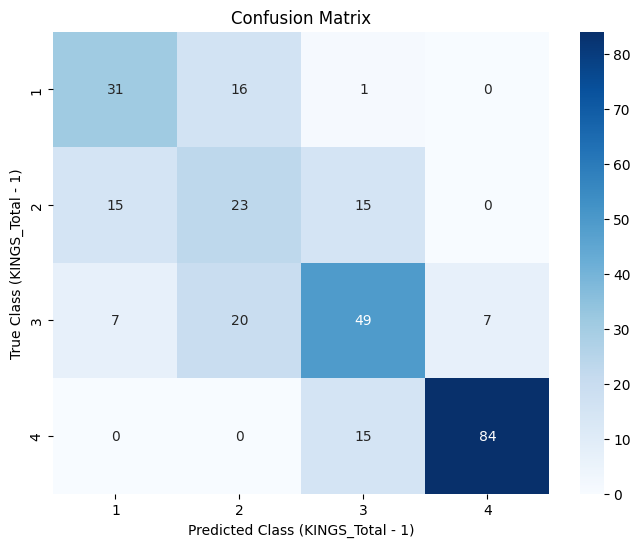

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels for the confusion matrix
class_labels = ['1', '2', '3', '4']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted Class (KINGS_Total - 1)')
plt.ylabel('True Class (KINGS_Total - 1)')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

##Without ALSFRS_R

In [13]:
# Cell 1 — Remove ALSFRS_R-related columns and rebuild train/test matrices

import numpy as np
import pandas as pd

# 1) Ensure we have column names for X; if not, try to recover them from the previous fitted model
if hasattr(X_train_scaled, "columns"):
    Xtr_full = X_train_scaled.copy()
    Xte_full = X_test_scaled.copy()
    colnames = list(Xtr_full.columns)
elif "res_glm" in globals():
    # Use the previously fitted model's exog names
    colnames = list(getattr(res_glm.model, "exog_names", []))
    if not colnames:
        raise ValueError("Could not recover column names from the previous model.")
    Xtr_full = pd.DataFrame(X_train_scaled, columns=colnames)
    Xte_full = pd.DataFrame(X_test_scaled,  columns=colnames)
else:
    raise ValueError("X_train_scaled has no column names. Please provide the feature names to proceed.")

# 2) Identify ALSFRS_R columns (case-insensitive, catches one-hot names too)
drop_cols = [c for c in colnames if "ALSFRS" in c.upper()]
if not drop_cols:
    print("No columns matching 'ALSFRS' were found — proceeding without dropping.")
else:
    print("Dropping columns:", drop_cols)

# 3) Build reduced design matrices
X_train_no_alsfrs = Xtr_full.drop(columns=drop_cols, errors="ignore").astype(float)
X_test_no_alsfrs  = Xte_full.drop(columns=drop_cols, errors="ignore").astype(float)

# 4) Prepare y (ensure 0..3 coding)
y_tr = pd.Series(y_train_res).astype(int)
if set(np.unique(y_tr)) == {1,2,3,4}:
    y_tr = y_tr - 1

y_te = pd.Series(y_test).astype(int)
if set(np.unique(y_te)) == {1,2,3,4}:
    y_te = y_te - 1

print("Shapes — X_train_no_alsfrs:", X_train_no_alsfrs.shape, "| X_test_no_alsfrs:", X_test_no_alsfrs.shape)


Dropping columns: ['ALSFRS_R']
Shapes — X_train_no_alsfrs: (1332, 26) | X_test_no_alsfrs: (283, 26)


In [14]:
# Cell 2 — Fit ordinal logistic GLM (no ALSFRS_R) and evaluate

from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
import numpy as np

# 1) Fit model on the reduced training set
mod_glm_no_alsfrs = OrderedModel(y_tr.values, X_train_no_alsfrs, distr="logit")
res_glm_no_alsfrs = mod_glm_no_alsfrs.fit(method="lbfgs", maxiter=300, disp=False)

print("=== Ordinal Logistic GLM WITHOUT ALSFRS_R — Train Summary ===")
print(res_glm_no_alsfrs.summary())

# 2) Evaluate on test
probs_no_alsfrs = res_glm_no_alsfrs.predict(X_test_no_alsfrs)   # (n_test, 4)
yhat_no_alsfrs  = np.asarray(probs_no_alsfrs).argmax(axis=1)

acc_no_alsfrs  = accuracy_score(y_te, yhat_no_alsfrs)
omae_no_alsfrs = mean_absolute_error(y_te, yhat_no_alsfrs)
cm_no_alsfrs   = confusion_matrix(y_te, yhat_no_alsfrs, labels=[0,1,2,3])

print("\n=== Test set (NO ALSFRS_R) ===")
print("Accuracy   :", round(acc_no_alsfrs, 3))
print("Ordinal MAE:", round(omae_no_alsfrs, 3))
print("Confusion matrix (rows=true, cols=pred):\n", cm_no_alsfrs)


=== Ordinal Logistic GLM WITHOUT ALSFRS_R — Train Summary ===
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -1138.0
Model:                   OrderedModel   AIC:                             2334.
Method:            Maximum Likelihood   BIC:                             2485.
Date:                Wed, 03 Sep 2025                                         
Time:                        11:34:37                                         
No. Observations:                1332                                         
Df Residuals:                    1303                                         
Df Model:                          26                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age_at_onset             